## General Imports

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Load Data, Split Train-Val, and Train Model

For the purpose of this examples we'll use the simple iris dataset and train a random forest model for multiclass classification

In [2]:
iris_df = load_iris(return_X_y=False, as_frame=True)['frame']
label_col = 'target'
df_train, df_test = train_test_split(iris_df, stratify=iris_df[label_col], random_state=0)

In [3]:
rf_clf = RandomForestClassifier()
rf_clf.fit(df_train.drop(label_col, axis=1), df_train[label_col]);

## Define MLChecks Dataset

In [4]:
from deepchecks import Dataset

Initialize the Dataset object, stating the relevant metadata about the dataset (e.g. the name for the label column) <br>
Check out the Dataset's attributes to see which additional special columns can be declared and used (e.g. index, date).

In [5]:
# We explicitly state that this dataset has no categorical features, otherwise they will be automatically inferred

ds_train = Dataset(df_train, label = label_col)
ds_test =  Dataset(df_test, label = label_col)

## Run Overall Generic Check Suite

In [6]:
from deepchecks.suites import overall_generic_check_suite


In [7]:
check_suite = overall_generic_check_suite()

Overall Generic Suite 
 The suite is composed of various checks such as: Data Sample Leakage Report, Single Feature Contribution, Single Feature Contribution Train Test, etc... 
 Each check may contain conditions (which results in 
 ✓ /
 ✖ /
 ! 
 ), as well as other outputs such as plots or tables. 
 Suites, checks and conditions can all be modified (see tutorial [link]). 
 Conditions Summary

Status,Check,Condition,More Info
✖,Single Feature Contribution - Train Dataset,Features PPS is not greater than 0.8,"Features with greater PPS: petal width (cm), petal length (cm)"
✖,Single Feature Contribution - Test Dataset,Features PPS is not greater than 0.8,"Features with greater PPS: petal length (cm), petal width (cm)"
✓,Data Sample Leakage Report,Percentage of test data samples that appear in train data not greater than 10.00%,
✓,Category Mismatch Train Test,Number of new category values is not greater than 0 for all columns,
✓,String Mismatch Comparison,No new variants allowed in test data for all columns,
✓,Special Characters - Test Dataset,Ratio of entirely special character samples not greater than 0.10% for all columns,
✓,Special Characters - Train Dataset,Ratio of entirely special character samples not greater than 0.10% for all columns,
✓,String Length Out Of Bounds - Test Dataset,Ratio of outliers not greater than 0% string length outliers for all columns,
✓,String Length Out Of Bounds - Train Dataset,Ratio of outliers not greater than 0% string length outliers for all columns,
✓,Rare Format Detection - Test Dataset,Rare formats ratio is not greater than 0,


Additional Outputs

Data Sample Leakage Report

Detect samples in the test data that appear also in training data.

2.63% (1.0 / 38) of test data samples appear in train data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
Test indices: 142,5.80,2.70,5.10,1.90,2
Train indices: 101,5.80,2.70,5.10,1.90,2


Single Feature Contribution - Train Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

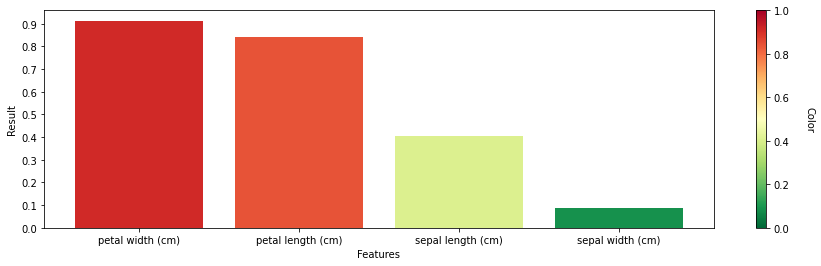

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution - Test Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

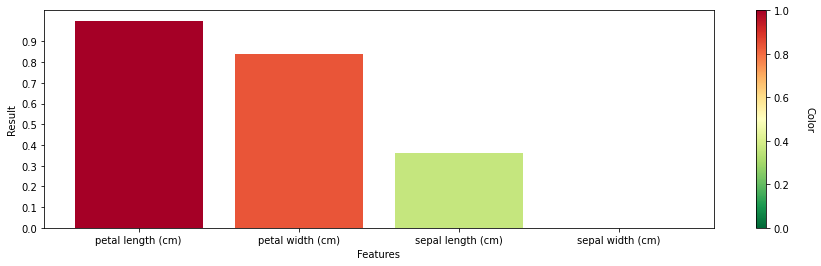

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution Train-Test

Return the difference in PPS (Predictive Power Score) of all features between train and test datasets.

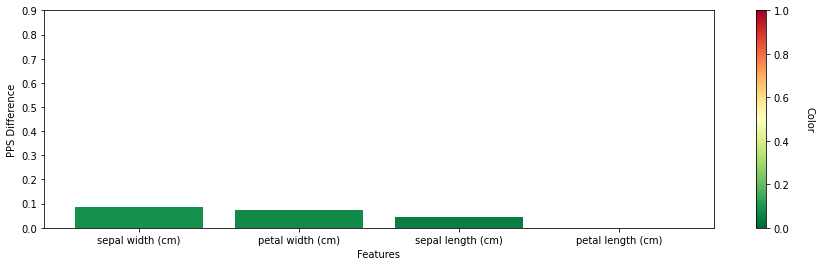

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

When we compare train PPS to test PPS, A high difference can strongly indicate leakage, as a feature

that was powerful in train but not in test can be explained by leakage in train that is not relevant to a new dataset.

Train-Test Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on test data.

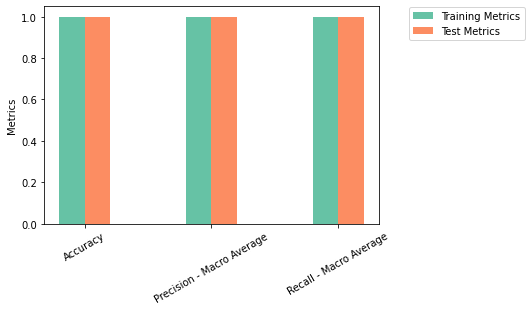

Unused Features

Detect features that are nearly unused by the model.

Features above the line are a sample of the most important features, while the features below the line are the unused features with highest variance, as defined by check parameters

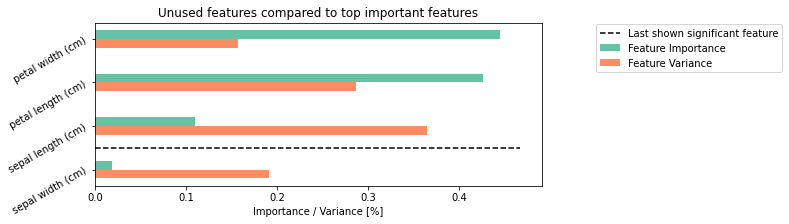

Performance Report - Train Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.00
Precision - Macro Average,1.00
Recall - Macro Average,1.00


Performance Report - Test Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.00
Precision - Macro Average,1.00
Recall - Macro Average,1.00


Naive Model Comparison

Compare naive model score to given model score.

The given model performs 2.92 times compared to the naive model using the Accuracy metric. RandomForestClassifier model prediction has achieved a score of 1 compared to Naive statistical prediction which achieved a score of 0.34 on tested data.

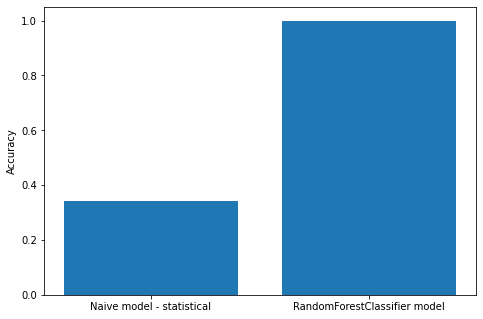

Check,Reason
Boosting Overfit,DeepchecksValueError: Unsupported model of type: RandomForestClassifier
Category Mismatch Train Test,Nothing found
String Mismatch Comparison,Nothing found
Special Characters - Test Dataset,Nothing found
Special Characters - Train Dataset,Nothing found
String Length Out Of Bounds - Test Dataset,Nothing found
String Length Out Of Bounds - Train Dataset,Nothing found
Rare Format Detection - Test Dataset,Nothing found
Rare Format Detection - Train Dataset,Nothing found
Dominant Frequency Change,Nothing found


In [8]:
check_suite.run(train_dataset=ds_train, test_dataset=ds_test, model=rf_clf, check_datasets_policy='both')

## Let's see what would've happened with a different train-val split:

In [9]:
train_len = round(0.67*iris_df.shape[0])
alternative_train_df = Dataset(iris_df[:train_len], label = label_col)
alternative_test_df = Dataset(iris_df[train_len:], label = label_col)
alt_rf_clf = RandomForestClassifier()
alt_rf_clf.fit(alternative_train_df.data.drop(label_col, axis=1), alternative_train_df.data[label_col]);

AttributeError: 'Dataset' object has no attribute 'drop'

In [ ]:
check_suite.run(train_dataset=alternative_train_df, test_dataset=alternative_test_df,
                             model=alt_rf_clf, check_datasets_policy='both')

##### Note that we found:
1. Validation Dataset 'target' column, which is the label column, had only one single unique value! This indicates something that's worth noticing (validation data is different than the training data and has only a single type of labels in samples...)
2. Validation dataset had a duplicate sample (which might be fine, use-case dependent). If not relevant, this check can be removed from suite.

## Create Custom CheckSuite

In [ ]:
from deepchecks import CheckSuite
from deepchecks.checks import *

In [ ]:
# check out which builtin performance checks exist
print([class_name for class_name in dir(performance) if class_name[0].isupper()])

In [ ]:
MyModelSuite = CheckSuite('Simple Suite For Model Performance',
    ModelInfo(),
    PerformanceReport(),
    TrainTestDifferenceOverfit(),
    ConfusionMatrixReport(),
    NaiveModelComparison(),
    NaiveModelComparison(naive_model_type='statistical')
)

In [ ]:
MyModelSuite.run(model=rf_clf, train_dataset=ds_train, test_dataset=ds_test, check_datasets_policy='both')